In [74]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import copy
import random
from math import *
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [76]:
# Data Process

data = [
  [3,13.88,5.04,2.23,20.0,80,0.98,0.34,0.4,0.68,4.9,0.58,1.33,415],
  [1,14.06,1.63,2.28,16.0,126,3.0,3.17,0.24,2.1,5.65,1.09,3.71,780],
  [3,12.6,2.46,2.2,18.5,94,1.62,0.66,0.63,0.94,7.1,0.73,1.58,695],
  [2,13.11,1.01,1.7,15.0,78,2.98,3.18,0.26,2.28,5.3,1.12,3.18,502],
  [1,13.05,1.77,2.1,17.0,107,3.0,3.0,0.28,2.03,5.04,0.88,3.35,885],
  [2,12.08,1.33,2.3,23.6,70,2.2,1.59,0.42,1.38,1.74,1.07,3.21,625],
  [2,13.34,0.94,2.36,17.0,110,2.53,1.3,0.55,0.42,3.17,1.02,1.93,750],
  [2,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352],
  [2,12.08,1.83,2.32,18.5,81,1.6,1.5,0.52,1.64,2.4,1.08,2.27,480],
  [2,12.08,1.39,2.5,22.5,84,2.56,2.29,0.43,1.04,2.9,0.93,3.19,385],
  [1,14.22,1.7,2.3,16.3,118,3.2,3.0,0.26,2.03,6.38,0.94,3.31,970],
  [2,12.29,1.41,1.98,16.0,85,2.55,2.5,0.29,1.77,2.9,1.23,2.74,428],
  [2,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495],
  [2,11.96,1.09,2.3,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886],
  [2,12.29,1.61,2.21,20.4,103,1.1,1.02,0.37,1.46,3.05,0.906,1.82,870],
  [1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.3,1.25,5.24,0.87,3.33,1080],
  [2,12.0,3.43,2.0,19.0,87,2.0,1.64,0.37,1.87,1.28,0.93,3.05,564],
  [1,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990],
  [2,12.29,3.17,2.21,18.0,88,2.85,2.99,0.45,2.81,2.3,1.42,2.83,406],
  [2,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.7,0.86,3.02,312],
  [3,12.96,3.45,2.35,18.5,106,1.39,0.7,0.4,0.94,5.28,0.68,1.75,675],
  [3,12.2,3.03,2.32,19.0,96,1.25,0.49,0.4,0.73,5.5,0.66,1.83,510],
  [2,12.08,1.13,2.51,24.0,78,2.0,1.58,0.4,1.4,2.2,1.31,2.72,630],
  [2,11.84,2.89,2.23,18.0,112,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500],
  [2,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495],
  [3,12.84,2.96,2.61,24.0,101,2.32,0.6,0.53,0.81,4.92,0.89,2.15,590],
  [3,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520],
  [3,13.52,3.17,2.72,23.5,97,1.55,0.52,0.5,0.55,4.35,0.89,2.06,520],
  [3,13.11,1.9,2.75,25.5,116,2.2,1.28,0.26,1.56,7.1,0.61,1.33,425],
  [1,14.12,1.48,2.32,16.8,95,2.2,2.43,0.26,1.57,5.0,1.17,2.82,1280],
  [2,12.0,0.92,2.0,19.0,86,2.42,2.26,0.3,1.43,2.5,1.38,3.12,278],
  [2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.0,0.93,3.69,465],
  [1,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480],
  [2,12.72,1.81,2.2,18.8,86,2.2,2.53,0.26,1.77,3.9,1.16,3.14,714],
  [2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410],
  [1,14.39,1.87,2.45,14.6,96,2.5,2.52,0.3,1.98,5.25,1.02,3.58,1290],
  [2,11.03,1.51,2.2,21.5,85,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407],
  [2,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.6,1.19,2.3,678],
  [2,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.4,1.0,3.17,510],
  [2,12.67,0.98,2.24,18.0,99,2.2,1.94,0.3,1.46,2.62,1.23,3.16,450],
  [1,14.38,1.87,2.38,12.0,102,3.3,3.64,0.29,2.96,7.5,1.2,3.0,1547],
  [3,13.08,3.9,2.36,21.5,113,1.41,1.39,0.34,1.14,9.4,0.57,1.33,550],
  [3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.9,0.57,1.63,470],
  [2,12.33,1.1,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680],
  [3,12.85,3.27,2.58,22.0,106,1.65,0.6,0.6,0.96,5.58,0.87,2.11,570],
  [2,12.08,2.08,1.7,17.5,97,2.23,2.17,0.26,1.4,3.3,1.27,2.96,710],
  [3,12.45,3.03,2.64,27.0,97,1.9,0.58,0.63,1.14,7.5,0.67,1.73,880],
  [3,12.53,5.51,2.64,25.0,96,1.79,0.6,0.63,1.1,5.0,0.82,1.69,515],
  [2,13.05,5.8,2.13,21.5,86,2.62,2.65,0.3,2.01,2.6,0.73,3.1,380],
  [2,11.41,0.74,2.5,21.0,88,2.48,2.01,0.42,1.44,3.08,1.1,2.31,434],
  [2,13.67,1.25,1.92,18.0,94,2.1,1.79,0.32,0.73,3.8,1.23,2.46,630],
  [2,12.0,1.51,2.42,22.0,86,1.45,1.25,0.5,1.63,3.6,1.05,2.65,450],
  [2,12.37,1.13,2.16,19.0,87,3.5,3.1,0.19,1.87,4.45,1.22,2.87,420],
  [2,11.65,1.67,2.62,26.0,88,1.92,1.61,0.4,1.34,2.6,1.36,3.21,562],
  [3,14.34,1.68,2.7,25.0,98,2.8,1.31,0.53,2.7,13.0,0.57,1.96,660],
  [2,12.42,4.43,2.73,26.5,102,2.2,2.13,0.43,1.71,2.08,0.92,3.12,365],
  [2,11.61,1.35,2.7,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680],
  [2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450],
  [1,14.2,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450],
  [2,12.37,1.17,1.92,19.6,78,2.11,2.0,0.27,1.04,4.68,1.12,3.48,510],
  [1,13.29,1.97,2.68,16.8,102,3.0,3.23,0.31,1.66,6.0,1.07,2.84,1270],
  [3,13.48,1.67,2.64,22.5,89,2.6,1.1,0.52,2.29,11.75,0.57,1.78,620],
  [2,12.52,2.43,2.17,21.0,88,2.55,2.27,0.26,1.22,2.0,0.9,2.78,325],
  [1,13.88,1.89,2.59,15.0,101,3.25,3.56,0.17,1.7,5.43,0.88,3.56,1095],
  [2,12.51,1.73,1.98,20.5,85,2.2,1.92,0.32,1.48,2.94,1.04,3.57,672],
  [1,14.1,2.16,2.3,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510],
  [3,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650],
  [2,12.42,1.61,2.19,22.5,108,2.0,2.09,0.34,1.61,2.06,1.06,2.96,345],
  [2,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472],
  [1,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185],
  [2,11.82,1.72,1.88,19.5,86,2.5,1.64,0.37,1.42,2.06,0.94,2.44,415],
  [2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.5,2.85,1.28,3.07,718],
  [3,13.16,3.57,2.15,21.0,102,1.5,0.55,0.43,1.3,4.0,0.6,1.68,830],
  [3,12.25,3.88,2.2,18.5,112,1.38,0.78,0.29,1.14,8.21,0.65,2.0,855],
  [3,12.88,2.99,2.4,20.0,104,1.3,1.22,0.24,0.83,5.4,0.74,1.42,530],
  [1,13.28,1.64,2.84,15.5,110,2.6,2.68,0.34,1.36,4.6,1.09,2.78,880],
  [3,12.82,3.37,2.3,19.5,88,1.48,0.66,0.4,0.97,10.26,0.72,1.75,685],
  [3,12.93,2.81,2.7,21.0,96,1.54,0.5,0.53,0.75,4.6,0.77,2.31,600],
  [3,12.51,1.24,2.25,17.5,85,2.0,0.58,0.6,1.25,5.45,0.75,1.51,650],
  [3,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.7,0.81,1.82,580],
  [1,13.76,1.53,2.7,19.5,132,2.95,2.74,0.5,1.35,5.4,1.25,3.0,1235],
  [3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835],
  [1,13.83,1.57,2.62,20.0,115,2.95,3.4,0.4,1.72,6.6,1.13,2.57,1130],
  [1,13.56,1.73,2.46,20.5,116,2.96,2.78,0.2,2.45,6.25,0.98,3.03,1120],
  [2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562],
  [1,13.64,3.1,2.56,15.2,116,2.7,3.03,0.17,1.66,5.1,0.96,3.36,845],
  [1,13.94,1.73,2.27,17.4,108,2.88,3.54,0.32,2.08,8.9,1.12,3.1,1260],
  [3,13.62,4.95,2.35,20.0,92,2.0,0.8,0.47,1.02,4.4,0.91,2.05,550],
  [1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.2,830],
  [1,14.22,3.99,2.51,13.2,128,3.0,3.04,0.2,2.08,5.1,0.89,3.53,760],
  [3,13.84,4.12,2.38,19.5,89,1.8,0.83,0.48,1.56,9.01,0.57,1.64,480],
  [1,13.75,1.73,2.41,16.0,89,2.6,2.76,0.29,1.81,5.6,1.15,2.9,1320],
  [1,13.82,1.75,2.42,14.0,111,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190],
  [2,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.3,0.88,2.42,488],
  [1,13.56,1.71,2.31,16.2,117,3.15,3.29,0.34,2.34,6.13,0.95,3.38,795],
  [2,12.42,2.55,2.27,22.0,90,1.68,1.84,0.66,1.42,2.7,0.86,3.3,315],
  [3,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.9,0.6,1.48,725],
  [3,12.7,3.55,2.36,21.5,106,1.7,1.2,0.17,0.84,5.0,0.78,1.29,600],
  [1,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.8,0.92,3.22,1195],
  [1,14.83,1.64,2.17,14.0,97,2.8,2.98,0.29,1.98,5.2,1.08,2.85,1045],
  [2,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.0,0.97,2.44,466],
  [2,12.33,0.99,1.95,14.8,136,1.9,1.85,0.35,2.76,3.4,1.06,2.31,750],
  [1,13.5,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845],
  [3,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.8,0.48,1.47,480],
  [1,14.19,1.59,2.48,16.5,108,3.3,3.93,0.32,1.86,8.7,1.23,2.82,1680],
  [2,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.8,1.0,2.75,680],
  [2,12.99,1.67,2.6,30.0,139,3.3,2.89,0.21,1.96,3.35,1.31,3.5,985],
  [3,13.78,2.76,2.3,22.0,90,1.35,0.68,0.41,1.03,9.58,0.7,1.68,615],
  [3,14.16,2.51,2.48,20.0,91,1.68,0.7,0.44,1.24,9.7,0.62,1.71,660],
  [2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355],
  [2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520],
  [1,12.93,3.8,2.65,18.6,102,2.41,2.41,0.25,1.98,4.5,1.03,3.52,770],
  [2,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.4,0.7,2.12,372],
  [1,13.05,1.73,2.04,12.4,92,2.72,3.27,0.17,2.91,7.2,1.12,2.91,1150],
  [1,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050],
  [1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065],
  [3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.6,1.62,840],
  [2,11.81,2.12,2.74,21.5,134,1.6,0.99,0.14,1.56,2.5,0.95,2.26,625],
  [1,13.24,3.98,2.29,17.5,103,2.64,2.63,0.32,1.66,4.36,0.82,3.0,680],
  [2,11.84,0.89,2.58,18.0,94,2.2,2.21,0.22,2.35,3.05,0.79,3.08,520],
  [3,13.36,2.56,2.35,20.0,89,1.4,0.5,0.37,0.64,5.6,0.7,2.47,780],
  [2,12.47,1.52,2.2,19.0,162,2.5,2.27,0.32,3.28,2.6,1.16,2.63,937],
  [2,12.7,3.87,2.4,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463],
  [1,14.75,1.73,2.39,11.4,91,3.1,3.69,0.43,2.81,5.4,1.25,2.73,1150],
  [2,11.82,1.47,1.99,20.8,86,1.98,1.6,0.3,1.53,1.95,0.95,3.33,495],
  [1,13.48,1.81,2.41,20.5,100,2.7,2.98,0.26,1.86,5.1,1.04,3.47,920],
  [3,13.5,3.12,2.62,24.0,123,1.4,1.57,0.22,1.25,8.6,0.59,1.3,500],
  [3,13.23,3.3,2.28,18.5,98,1.8,0.83,0.61,1.87,10.52,0.56,1.51,675],
  [2,12.04,4.3,2.38,22.0,80,2.1,1.75,0.42,1.35,2.6,0.79,2.57,580],
  [1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.9,1.09,2.88,1515],
  [1,14.1,2.02,2.4,18.8,103,2.75,2.92,0.32,2.38,6.2,1.07,2.75,1060],
  [2,12.34,2.45,2.46,21.0,98,2.56,2.11,0.34,1.31,2.8,0.8,3.38,438],
  [1,13.41,3.84,2.12,18.8,90,2.45,2.68,0.27,1.48,4.28,0.91,3.0,1035],
  [3,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.8,3.85,0.75,1.27,720],
  [3,13.4,4.6,2.86,25.0,112,1.98,0.96,0.27,1.11,8.5,0.67,1.92,630],
  [1,14.3,1.92,2.72,20.0,120,2.8,3.14,0.33,1.97,6.2,1.07,2.65,1280],
  [2,12.37,1.07,2.1,18.5,88,3.52,3.75,0.24,1.95,4.5,1.04,2.77,660],
  [1,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.8,1.11,4.0,1035],
  [1,14.02,1.68,2.21,16.0,96,2.65,2.33,0.26,1.98,4.7,1.04,3.59,1035],
  [1,13.3,1.72,2.14,17.0,94,2.4,2.19,0.27,1.35,3.95,1.02,2.77,1285],
  [1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045],
  [1,13.73,1.5,2.7,22.5,101,3.0,3.25,0.29,2.38,5.7,1.19,2.71,1285],
  [2,11.45,2.4,2.42,20.0,96,2.9,2.79,0.32,1.83,3.25,0.8,3.39,625],
  [2,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.3,290],
  [3,13.69,3.26,2.54,20.0,107,1.83,0.56,0.5,0.8,5.88,0.96,1.82,680],
  [2,13.03,0.9,1.71,16.0,86,1.95,2.03,0.24,1.46,4.6,1.19,2.48,392],
  [1,13.51,1.8,2.65,19.0,110,2.35,2.53,0.29,1.54,4.2,1.1,2.87,1095],
  [1,13.9,1.68,2.12,16.0,101,3.1,3.39,0.21,2.14,6.1,0.91,3.33,985],
  [2,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.8,1.23,2.14,428],
  [3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.1,0.76,1.29,630],
  [3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740],
  [2,12.37,1.63,2.3,24.5,88,2.22,2.45,0.4,1.9,2.12,0.89,2.78,342],
  [1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105],
  [3,13.4,3.91,2.48,23.0,102,1.8,0.75,0.43,1.41,7.3,0.7,1.56,750],
  [2,12.07,2.16,2.17,21.0,85,2.6,2.65,0.37,1.35,2.76,0.86,3.28,378],
  [1,13.24,2.59,2.87,21.0,118,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735],
  [1,13.07,1.5,2.1,15.5,98,2.4,2.64,0.28,1.37,3.7,1.18,2.69,1020],
  [1,12.85,1.6,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015],
  [3,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.8,750],
  [2,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345],
  [2,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.8,0.75,3.64,380],
  [1,13.87,1.9,2.8,19.4,107,2.95,2.97,0.37,1.76,4.5,1.25,3.4,915],
  [1,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.9,1.04,3.44,1065],
  [3,13.45,3.7,2.6,23.0,111,1.7,0.92,0.43,1.46,10.68,0.85,1.56,695],
  [3,12.58,1.29,2.1,20.0,103,1.48,0.58,0.53,1.4,7.6,0.58,1.55,640],
  [1,14.06,2.15,2.61,17.6,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295],
  [2,12.6,1.34,1.9,18.5,88,1.45,1.36,0.29,1.35,2.45,1.04,2.77,562]
]

data = np.array(data)
classes = data[:,0]
class_names = ["P1", "P2", "P3"]
encoder = OneHotEncoder(sparse=False)
data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

class_data = [[], [], []]

for i, product in enumerate(data):
    class_data[int(classes[i]) - 1].append(product[1:])

partioned_p1 = np.array_split(class_data[0], 4)
partioned_p2 = np.array_split(class_data[1], 4)
partioned_p3 = np.array_split(class_data[2], 4)

training_p1 = np.concatenate((partioned_p1[0], partioned_p1[1], partioned_p1[2]), axis=0)
training_p2 = np.concatenate((partioned_p2[0], partioned_p2[1], partioned_p2[2]), axis=0)
training_p3 = np.concatenate((partioned_p3[0], partioned_p3[1], partioned_p3[2]), axis=0)

validation_p1 = partioned_p1[3]
validation_p2 = partioned_p2[3]
validation_p3 = partioned_p3[3]

x_train = np.concatenate((training_p1, training_p2, training_p3), axis=0)
y_train = np.array(
    [0 for i in range(len(training_p1))] + 
    [1 for i in range(len(training_p2))] + 
    [2 for i in range(len(training_p3))]
)

x_test = np.concatenate((validation_p1, validation_p2, validation_p3), axis=0)
y_test = np.array(
    [0 for i in range(len(validation_p1))] + 
    [1 for i in range(len(validation_p2))] + 
    [2 for i in range(len(validation_p3))]
)

y_train_encoded = encoder.fit_transform(y_train.reshape(-1,1))
y_test_encoded = encoder.fit_transform(y_test.reshape(-1,1))
test = np.array([
    [13.72, 1.43, 2.5, 16.7, 108, 3.4, 3.67, 0.19, 2.04, 6.8, 0.89, 2.87, 1285],
    [12.04, 4.3, 2.38, 22, 80, 2.1, 1.75, 0.42, 1.35, 2.6, 0.79, 2.57, 580], 
    [14.13, 4.1, 2.74, 24.5, 96, 2.05, 0.76, 0.56, 1.35, 9.2, 0.61, 1.6, 560],
])

test = (test - test.min(axis=0)) / (test.max(axis=0) - test.min(axis=0))

Final test set loss: 0.900655
Final test set accuracy: 0.609756


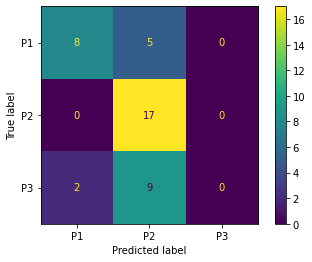

In [77]:
# 1 Hidden Layer, 1 nodes, 3 nodes in output layer

mlp = keras.models.Sequential()

mlp.add(Dense(1, activation="sigmoid", input_shape=(13,)))
mlp.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(x_train, y_train_encoded, verbose=0, batch_size=5, epochs=100)
results = mlp.evaluate(x_test, y_test_encoded, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()

Final test set loss: 0.320158
Final test set accuracy: 0.951219


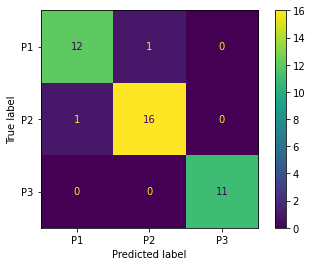

In [78]:
# 1 Hidden Layer, 10 nodes, 3 nodes in output layer

mlp = keras.models.Sequential()

mlp.add(Dense(10, activation="sigmoid", input_shape=(13,)))
mlp.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(x_train, y_train_encoded, verbose=0, batch_size=5, epochs=100)
results = mlp.evaluate(x_test, y_test_encoded, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()

Final test set loss: 0.745204
Final test set accuracy: 0.829268


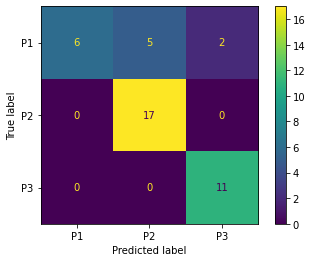

In [79]:
# 2 Hidden Layers, 1 nodes, 1 nodes, 3 nodes in output layer

mlp = keras.models.Sequential()

mlp.add(Dense(1, activation="sigmoid", input_shape=(13,)))
mlp.add(Dense(1, activation='relu', name='hidden1'))
mlp.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(x_train, y_train_encoded, verbose=0, batch_size=5, epochs=100)
results = mlp.evaluate(x_test, y_test_encoded, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()

Final test set loss: 0.091236
Final test set accuracy: 1.000000


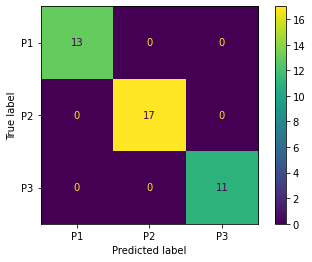

In [80]:
# 2 Hidden Layers, 10 nodes, 5 nodes, 3 nodes in output layer

mlp = keras.models.Sequential()

mlp.add(Dense(10, activation="sigmoid", input_shape=(13,)))
mlp.add(Dense(5, activation='relu', name='hidden1'))
mlp.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(x_train, y_train_encoded, verbose=0, batch_size=5, epochs=100)
results = mlp.evaluate(x_test, y_test_encoded, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()

Final test set loss: 0.132263
Final test set accuracy: 0.951219


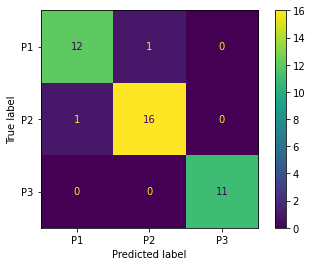

In [81]:
# 2 Hidden Layers, 10 nodes, 10 nodes, 3 nodes in output layer

mlp = keras.models.Sequential()

mlp.add(Dense(10, activation="sigmoid", input_shape=(13,)))
mlp.add(Dense(10, activation='relu', name='hidden1'))
mlp.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(x_train, y_train_encoded, verbose=0, batch_size=5, epochs=100)
results = mlp.evaluate(x_test, y_test_encoded, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()

Final test set loss: 0.048859
Final test set accuracy: 1.000000


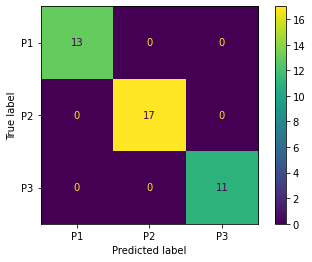

In [82]:
# 3 Hidden Layers, 10 nodes, 10 nodes, 10 nodes, 3 nodes in output layer

mlp = keras.models.Sequential()

mlp.add(Dense(10, activation="sigmoid", input_shape=(13,)))
mlp.add(Dense(10, activation='relu', name='hidden1'))
mlp.add(Dense(10, activation='relu', name='hidden2'))
mlp.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(x_train, y_train_encoded, verbose=0, batch_size=5, epochs=100)
results = mlp.evaluate(x_test, y_test_encoded, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()

Final test set loss: 0.096456
Final test set accuracy: 0.951219


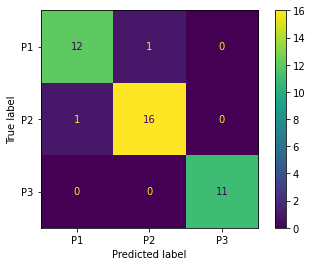

In [83]:
# 4 Hidden Layers, 10 nodes, 10 nodes, 10 nodes, 10 nodes, 3 nodes in output layer

mlp = keras.models.Sequential()

mlp.add(Dense(10, activation="sigmoid", input_shape=(13,)))
mlp.add(Dense(10, activation='relu', name='hidden1'))
mlp.add(Dense(10, activation='relu', name='hidden2'))
mlp.add(Dense(10, activation='relu', name='hidden3'))
mlp.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(lr=0.001)
mlp.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(x_train, y_train_encoded, verbose=0, batch_size=5, epochs=100)
results = mlp.evaluate(x_test, y_test_encoded, verbose=0)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

class_results = mlp.predict_classes(x_test)
confusion_matrix_vals = confusion_matrix(y_test, class_results)
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_vals, display_labels=class_names)
disp1.plot()